# ECP Group 05 Homework 02

## Josef Aktan, Noah Schneider, Zhan He

### 1. Grayscale Image Multiplication

In [52]:
# !pip install scikit-image

In [53]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.metrics import structural_similarity as ssim
from math import log10

# Read imgs
fruits = io.imread("fruits.png")
peppers = io.imread("peppers.tiff")

# Read LUTs
LUT0 = pd.read_excel("Approximate Multiplier LUTs/SCDM8_41_LUT.xlsx")
LUT1 = pd.read_excel("Approximate Multiplier LUTs/SCDM8_81_LUT.xlsx")
LUT2 = pd.read_excel("Approximate Multiplier LUTs/SCDM8_a4_LUT.xlsx")

# Gray scale
fruits = (0.299 * np.array(fruits[:,:,0])) + (0.587 * np.array(fruits[:,:,1])) + (0.114 * np.array(fruits[:,:,2]))
peppers = (0.299 * np.array(peppers[:,:,0])) + (0.587 * np.array(peppers[:,:,1])) + (0.114 * np.array(peppers[:,:,2]))

# Scale range
fruits = np.floor(fruits / 2).astype(int)
peppers = np.floor(peppers / 2).astype(int)

In [54]:
def LUT_mul (a, b, LUT):
    assert a.shape == b.shape, "matrices must have same dimensions"
    res = np.zeros(a.shape)
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            # Get value from LUT with shifted indices
            res[i][j] = LUT[a[i][j]+128][b[i][j]+128]
    return res

# Multiply images
exact = fruits * peppers
approx_0 = LUT_mul(fruits, peppers, LUT0)
approx_1 = LUT_mul(fruits, peppers, LUT1)
approx_2 = LUT_mul(fruits, peppers, LUT2)

In [55]:
def LUT_mul (a, b, LUT):
    assert a.shape == b.shape, "matrices must have same dimensions"
    res = np.zeros(a.shape)
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            # Get value from LUT with shifted indices
            res[i][j] = LUT[a[i][j]+128][b[i][j]+128]
    return res

# Multiply images
exact = fruits * peppers
approx_0 = LUT_mul(fruits, peppers, LUT0)
approx_1 = LUT_mul(fruits, peppers, LUT1)
approx_2 = LUT_mul(fruits, peppers, LUT2)

#### SSIM (original)

In [56]:
# SSIM
data_range=exact.max() - approx_0.max()
ssi_0 = ssim(exact, approx_0, data_range=data_range)
print(ssi_0)

data_range=exact.max() - approx_1.max()
ssi_1 = ssim(exact, approx_1, data_range=data_range)
print(ssi_1)

data_range=exact.max() - approx_2.max()
ssi_2 = ssim(exact, approx_2, data_range=data_range)
print(ssi_2)

0.9993626570162489
0.9046836965327921
0.6043938705277963


#### SSIM (data range adjustment)

In [57]:
exact.dtype

dtype('int64')

In [58]:
approx_0.dtype

dtype('float64')

In [177]:
exact.max()

np.int64(14224)

In [187]:
127 * 127

16129

In [189]:
data_range = 16129  # (127-0) * (127-0)  possibly max: 127; possibly min: 0
ssi_0 = ssim(exact, approx_0.astype('int64'), data_range=data_range)
print(ssi_0)
ssi_1 = ssim(exact, approx_1.astype('int64'), data_range=data_range)
print(ssi_1)
ssi_2 = ssim(exact, approx_2.astype('int64'), data_range=data_range)
print(ssi_2)

0.9998381554268467
0.9632893418771586
0.7129050666325134


In [60]:
# Maximum error distance
med_0 = (exact - approx_0).max()
print(med_0)
med_1 = (exact - approx_1).max()
print(med_1)
med_2 = (exact - approx_2).max()
print(med_2)

44.0
704.0
3276.0


In [61]:
# Mean squared error
mse_0 = np.mean((exact - approx_0)**2)
print(mse_0)
mse_1 = np.mean((exact - approx_1)**2)
print(mse_1)
mse_2 = np.mean((exact - approx_2)**2)
print(mse_2)

122.1685791015625
71205.02600097656
1614610.6627197266


In [62]:
# Peak signal to noise ratio
psnr_0 = 10 * log10((exact.max()**2) /mse_0)
print(psnr_0)
psnr_1 = 10 * log10((exact.max()**2) /mse_1)
print(psnr_1)
psnr_2 = 10 * log10((exact.max()**2) /mse_2)
print(psnr_2)

62.19083964467469
34.53532837892763
20.97975671060132


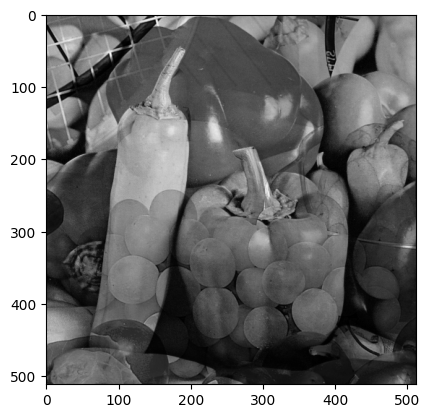

In [63]:
plt.imshow(exact, cmap="gray")

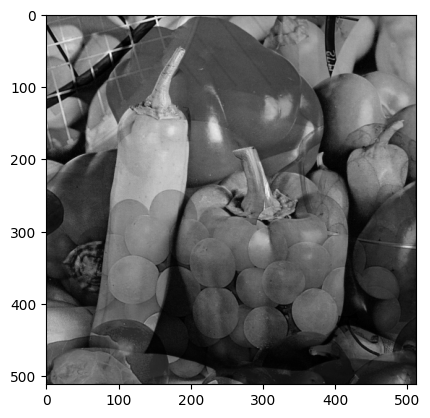

In [64]:
plt.imshow(approx_0, cmap="gray")

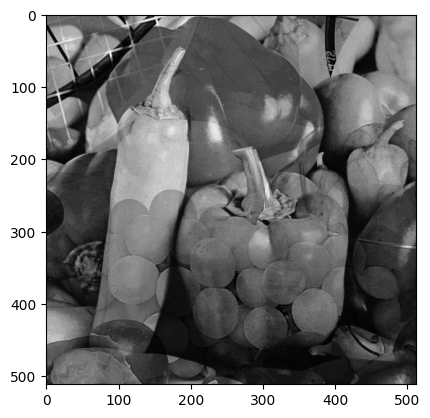

In [65]:
plt.imshow(approx_1, cmap="gray")

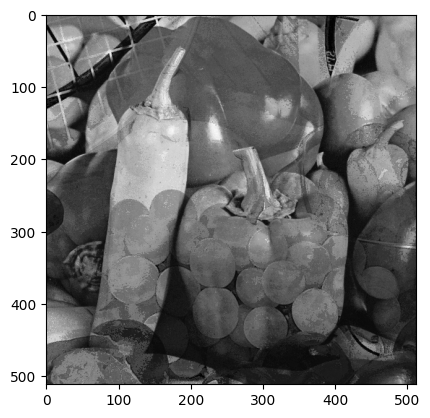

In [66]:
plt.imshow(approx_2, cmap="gray")

### 2. Perform low-pass filtering

In [165]:
f1 = [
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]
f1 = 1/9 *np.array(f1)

#again a normalized gaussian filter
f2 = [
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
] 
f2 = 1/16 *np.array(f2)

f3 = [
    [1, 4,  7,  4,  1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4,  7,  4,  1]
]
f3 = 1/273 *np.array(f3)

f4 = [
    [0, -1,  0],
    [-1, 4, -1],
    [0, -1,  0]
]
f4 = np.array(f4)

f5 = [
    [-1, 0,  -1],
    [0,  4,   0],
    [-1, 0,  -1]
]
f5 = np.array(f5)

f6 = [
    [1,   2,   1],
    [0,   0,   0],
    [-1, -2,  -1]
]
f6 = np.array(f6)

In [68]:
# Perform low-pass filtering (f1–f3) and high-pass filtering (f4–f6) on a color image, 
# and assess the image quality (using SSIM, maximum error distance, MSE, and PSNR) under the following conditions:

In [69]:
# Read imgs again
fruits = io.imread("fruits.png")
# peppers = io.imread("peppers.tiff")

In [72]:
f1.shape

(3, 3)

#### no padding (discard)

In [127]:
# filter_list = [f1, f2, f3, f4, f5, f6]

# # initial
# # filtered_result = np.zeros_like(fruits, dtype=np.float32)
# filtered_result_list = []

# # filtering
# for f in filter_list:
#     # filtered_shape = 
#     filtered_result = np.zeros((512-f.shape[0]+1, 512-f.shape[1]+1, 3), dtype=np.float32)
#     for channel in range(3):  # RGB
#         image = fruits[:, :, channel]
#         for row in range(image.shape[0]-f.shape[0]+1):  # 512
#             for column in range(image.shape[1]-f.shape[1]+1):  # 512
#                 region = image[row:row+f.shape[0], column:column+f.shape[1]]
#                 # print(region)
#                 filtered_result[row, column, channel] =  np.sum(region * f)
#     filtered_result_list.append(filtered_result)

#### (a) Using the exact adder and exact multiplier.

##### Ich weiß es nicht genau, ob der Exact Adder eine LUT braucht (wie Exercise4) – ich habe einfach np.sum(region * f) verwendet.

In [128]:
filter_list = [f1, f2, f3, f4, f5, f6]
filtered_result_list = []

H, W, C = fruits.shape  #  (512, 512, 3)

for f in filter_list:
    kh, kw = f.shape  # kernel_shape
    ph, pw = kh // 2, kw // 2  # padding calc
    # print("ph=", ph, "pw=", pw)
    
    filtered_result = np.zeros((H, W, 3), dtype=np.float32)
    for channel in range(3):
        image = fruits[:, :, channel]
        
        # auto padding
        padded = np.pad(image, ((ph, ph), (pw, pw)), mode='constant', constant_values=0)
        
        # filtering
        for row in range(H):
            for column in range(W):
                region = padded[row:row+kh, column:column+kw]
                filtered_result[row, column, channel] = np.sum(region * f)  ### exact adder
    
    filtered_result_list.append(filtered_result)
    # print(f"filter shape = {f.shape}, output shape = {filtered_result.shape}")

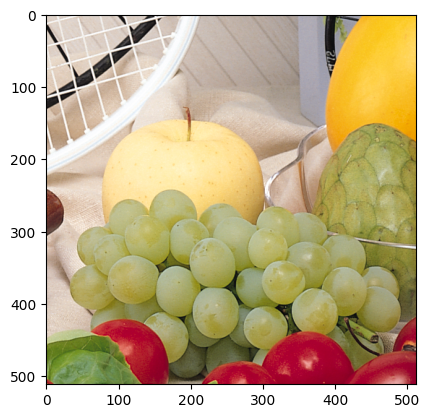

In [104]:
plt.imshow(fruits)

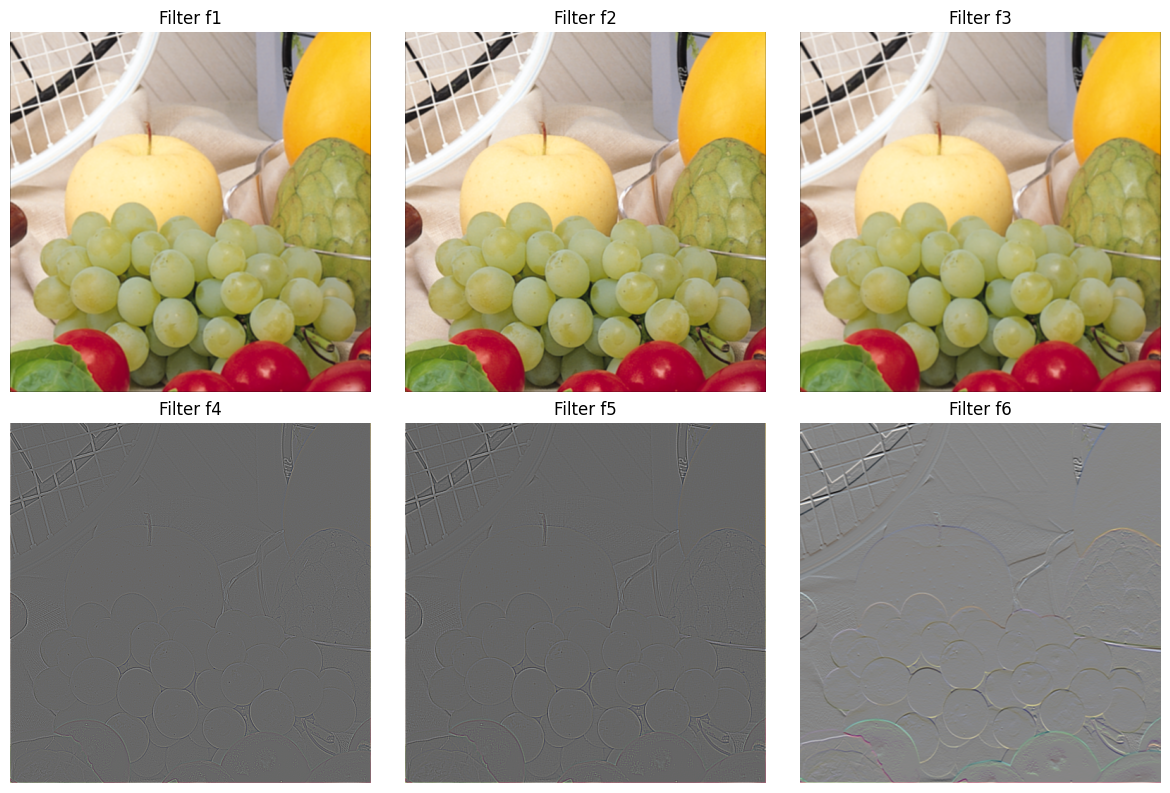

In [108]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()  # easy to iterate

for i, ax in enumerate(axes):
    img = filtered_result_list[i]
    img_norm = (img - img.min()) / (img.max() - img.min())  # rescale pixel value (rgb)
    ax.imshow(img_norm)
    ax.set_title(f"Filter f{i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# img = filtered_result_list[2]
# plt.imshow((img - img.min()) / (img.max() - img.min()))

In [113]:
fruits.min()

np.uint8(0)

In [115]:
filtered_result_list[0].max()

np.float32(255.0)

In [118]:
for i in range(len(filtered_result_list)):
    ssi_f = ssim(fruits, filtered_result_list[i].astype('uint8'), channel_axis=-1)
    print(ssi_f)

0.8990037096005117
0.9353065086444455
0.8954212958168183
-0.046259673974979265
-0.04110258948635573
0.006145564924216795


In [122]:
for i in range(len(filtered_result_list)):
    med_f = (fruits - filtered_result_list[i]).max()
    print(med_f)

139.66666
109.8125
129.70331
390.0
540.0
1274.0


In [121]:
for i in range(len(filtered_result_list)):
    mse_f = np.mean((fruits - filtered_result_list[i])**2)
    print(mse_f)

64.59788
38.65166
68.45756
27866.37
28421.164
33998.203


In [126]:
for i in range(len(filtered_result_list)):
    psnr_f = 10 * log10((filtered_result_list[i].max()**2) / mse_f)
    print(psnr_f)

2.81624404241796
2.81624404241796
2.81624404241796
8.785599483729666
12.267357728422535
14.10167267579727


#### Using the exact adder and approximate multipliers

In [193]:
# scaling the filter
def filter_approx(fvalue, LUT, scale_fvalue=32.0):
    fvalue_idx = np.clip(np.round(fvalue * scale_fvalue).astype(int), -128, 127)
    return fvalue_idx

In [167]:
f4_ = filter_approx(f4, LUT0)

In [168]:
f4_

array([[  0, -32,   0],
       [-32, 127, -32],
       [  0, -32,   0]])

In [169]:
fruits_2 = np.floor(fruits / 2).astype(int)
filtered_result_list_2 = []

H, W, C = fruits_2.shape  #  (512, 512, 3)

for f in filter_list:
    kh, kw = f.shape  # kernel_shape
    ph, pw = kh // 2, kw // 2  # padding calc
    # print("ph=", ph, "pw=", pw)
    
    filtered_result = np.zeros((H, W, 3), dtype=np.int64)
    for channel in range(3):
        image = fruits_2[:, :, channel]
        
        # auto padding
        padded = np.pad(image, ((ph, ph), (pw, pw)), mode='constant', constant_values=0)
        
        # filtering
        for row in range(H):
            for column in range(W):
                region = padded[row:row+kh, column:column+kw]
                filtered_result[row, column, channel] = np.sum(LUT_mul(region, filter_approx(f, LUT0), LUT0))
    
    filtered_result_list_2.append(filtered_result)
    # print(f"filter shape = {f.shape}, output shape = {filtered_result.shape}")

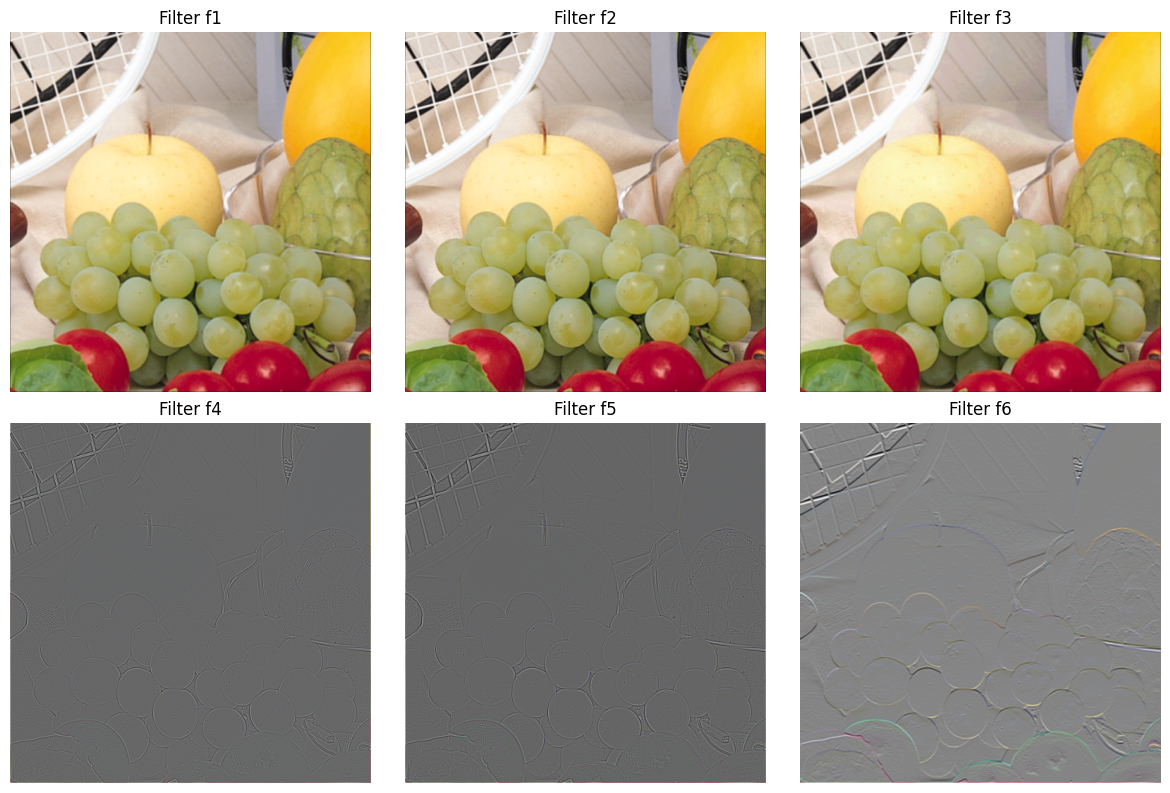

In [202]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()  # easy to iterate

for i, ax in enumerate(axes):
    img = filtered_result_list_2[i]
    img_norm = (img - img.min()) / (img.max() - img.min())  # rescale pixel value (rgb)
    ax.imshow(img_norm)
    ax.set_title(f"Filter f{i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [146]:
filtered_result_list[7].shape

(512, 512, 3)

In [201]:
for i in range(len(filtered_result_list_2)):
    ssi_f = ssim(fruits, (filtered_result_list_2[i]/32).astype('uint8'), channel_axis=-1)  # rescale: divide by 32
    print(ssi_f)

0.6982976971141802
0.6585072794722486
0.5772514757231763
-0.028884835821543373
-0.03328878176660507
0.005636829950814968


In [176]:
filtered_result_list_2[1].max()

np.int64(4064)

In [197]:
for i in range(len(filtered_result_list_2)):
    med_f = (fruits - filtered_result_list_2[i]/32).max()  # rescale: divide by 32
    print(med_f)

188.875
180.9375
195.0
300.25
323.5625
763.0


In [192]:
for i in range(len(filtered_result_list_2)):
    mse_f = np.mean((fruits - filtered_result_list_2[i]/32)**2)
    print(mse_f)

5501.589468578498
7118.476610605915
8731.435162914297
28826.348354025435
28764.71310981487
29532.45117823283


In [196]:
for i in range(len(filtered_result_list_2)):
    psnr_f = 10 * log10(((filtered_result_list_2[i].max()/32)**2) / mse_f)
    print(psnr_f)

-1.6038700787264544
-2.6269205276740806
-3.7380443107137356
3.2318861262850787
6.761691661772463
8.683342664529025


#### Using the approximate adders and the exact multiplier

In [ ]:
# Truth table for an approximate adder

# A B C S C_out 
# 0 0 0 0  1 
# 0 0 1 1  0
# 0 1 0 1  0
# 0 1 1 0  1
# 1 0 0 1  0
# 1 0 1 0  1
# 1 1 0 1  1
# 1 1 1 1  1

In [207]:
def ApproxAdder(a, b, c):
    if a==0 and b==0 and c==0:
        s=0
        c_out=1  # exact: 0
    elif a==0 and b==0 and c==1:
        s=1
        c_out=0
    elif a==0 and b==1 and c==0:
        s=1
        c_out=0
    elif a==0 and b==1 and c==1:
        s=0
        c_out=1
    elif a==1 and b==0 and c==0:
        s=1
        c_out=0
    elif a==1 and b==0 and c==1:
        s=0
        c_out=1
    elif a==1 and b==1 and c==0:
        s=1  # exact: 0
        c_out=1
    elif a==1 and b==1 and c==1:
        s=1
        c_out=1
    return s, c_out

In [208]:
fruits.shape

(512, 512, 3)

In [246]:
def MyNbitAdder(a, b):
    # convert to binary and cut off the first two indices (they dont belong to the number but indicate that it is binary)
    a = int(a)
    b = int(b)
    a_bin, b_bin = bin(a)[2:], bin(b)[2:]
    
    # reverse order of bytes for the adder
    rev_a, rev_b = list(a_bin[::-1]), list(b_bin[::-1])
    
    # We want to make the two bytes equal length such that we can add
    # --> add zeros to the shortest list until it is the same as the longest
    rev_a = rev_a + max(0, len(rev_b) - len(rev_a)) * [0]
    rev_b = rev_b + max(0, len(rev_a) - len(rev_b)) * [0]
    
    carry_over = 0
    total_sum = 0
    count = 0

    #############################################
    # all bits use ApproxAdder
    #############################################
    
    # we want to do a bitwise addition
    for index, (bit1, bit2) in enumerate(zip(rev_a, rev_b)):
        # use approx_adder for all bits
        sum_element, carry_over = ApproxAdder(int(bit1), int(bit2), int(carry_over))
        count += 1
        total_sum += pow(2, index) * sum_element

    total_sum += pow(2, index + 1) * carry_over
    return total_sum, count

In [216]:
MyNbitAdder(10, 20)

(32, 5)

In [217]:
(region * f).shape

(3, 3)

In [247]:
filtered_result_list_3 = []

H, W, C = fruits.shape  #  (512, 512, 3)

for f in filter_list:
    kh, kw = f.shape  # kernel_shape
    ph, pw = kh // 2, kw // 2  # padding calc
    # print("ph=", ph, "pw=", pw)
    
    filtered_result = np.zeros((H, W, 3), dtype=np.int64)
    for channel in range(3):
        image = fruits[:, :, channel]
        
        # auto padding
        padded = np.pad(image, ((ph, ph), (pw, pw)), mode='constant', constant_values=0)
        
        # filtering
        for row in range(H):
            for column in range(W):
                region = padded[row:row+kh, column:column+kw]
                filtered_region = region * f
                for i in range(filtered_region.shape[0]):
                    for j in range(filtered_region.shape[1]):
                        filtered_result[row, column, channel] = MyNbitAdder(
                                                                filtered_result[row, column, channel], 
                                                                filtered_region[i][j]
                                                               )[0]
                # filtered_result[row, column, channel] = np.sum(region * f)
    
    filtered_result_list_3.append(filtered_result)
    # print(f"filter shape = {f.shape}, output shape = {filtered_result.shape}")

ValueError: invalid literal for int() with base 10: 'b'

In [248]:
len(filtered_result_list_3)

3

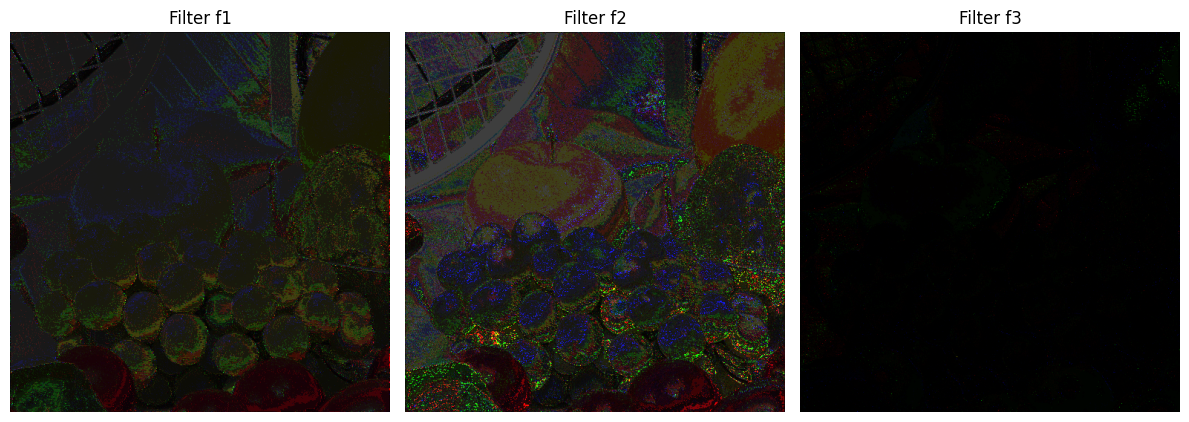

In [249]:
fig, axes = plt.subplots(1, 3, figsize=(12, 8))
axes = axes.flatten()  # easy to iterate

for i, ax in enumerate(axes):
    img = filtered_result_list_3[i]
    img_norm = (img - img.min()) / (img.max() - img.min())  # rescale pixel value (rgb)
    ax.imshow(img_norm)
    ax.set_title(f"Filter f{i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [250]:
for i in range(len(filtered_result_list_3)):
    ssi_f = ssim(fruits, filtered_result_list_3[i].astype('uint8'), channel_axis=-1)
    print(ssi_f)

0.24359899930659434
0.06143165261092528
0.027169925382198614


In [251]:
for i in range(len(filtered_result_list_3)):
    med_f = (fruits - filtered_result_list_3[i]).max()
    print(med_f)

76
57
24


In [252]:
for i in range(len(filtered_result_list_3)):
    mse_f = np.mean((fruits - filtered_result_list_3[i])**2)
    print(mse_f)

828794.3109169006
525732.2808189392
73134220353.4916


In [253]:
for i in range(len(filtered_result_list_3)):
    psnr_f = 10 * log10((filtered_result_list_3[i].max()**2) / mse_f)
    print(psnr_f)

-29.201780831619587
-35.22330728921051
37.01303043393507
